#This jupyter notebook is prepared by “Brandon Gibbons”.

## **1. import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

## **2. import the data to a dataframe and show how many rows and columns does it have (1 pt)**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hrdata.csv')
data.shape

(21287, 18)

## **3. call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)**


In [ ]:
data.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


### **I. Explain in words if you find any column’s statistics interesting and good to know (1 pt)**

Upon looking at some of the stats provided in .describe(), rec_num and enrolee_id stats are useless. However, for numerical features such as training_hours it is useful to quickly see mean, median, and mode.

Some interesting columns to note is experience and last_new_job seem to be represented as bins of certain intervals, making summary statistics useless in .describe(include='all') .

## **4. Show the top 5 rows and last 5 rows of the data frame (1 pt)**

In [ ]:
data.head()
data.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


## **5. List all the numerical columns (1 pt)**

In [ ]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

## **6. List all the categorial columns (1 pt)**

In [ ]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

## **7. Examine missing values: (2 + 2 + 2 + 5 = 11 pt)**

### **I. Show a list with column wise count of missing values and display the list in count wise descending order**

In [ ]:
nulls = data.isnull().sum().to_frame('nulls')
nulls.sort_values('nulls', inplace=True, ascending=False)
nulls

,nulls
company_type,6774
company_size,6560
gender,5016
major_discipline,3125
target,2129
education_level,512
last_new_job,463
enrolled_university,417
experience,70
state,0


### **II. Show a list with column wise percentage of missing values and display the list in percentage wise descending order**

In [ ]:
percentage = data.isnull().mean() * 100
percentage = percentage.to_frame('nulls')
percentage.sort_values('nulls', inplace=True, ascending=False)
percentage

,nulls
company_type,31.822239
company_size,30.816931
gender,23.563677
major_discipline,14.680321
target,10.001409
education_level,2.405224
last_new_job,2.175036
enrolled_university,1.958942
experience,0.328839
state,0.000000


### **III. Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot**

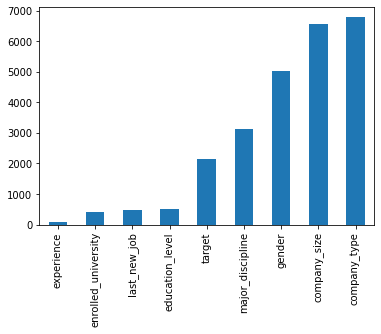

In [ ]:
missing = data.isnull().sum()         
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

### **IV. Use missingno’s bar plot, matrix plot with 200 sample, and heatmap.**

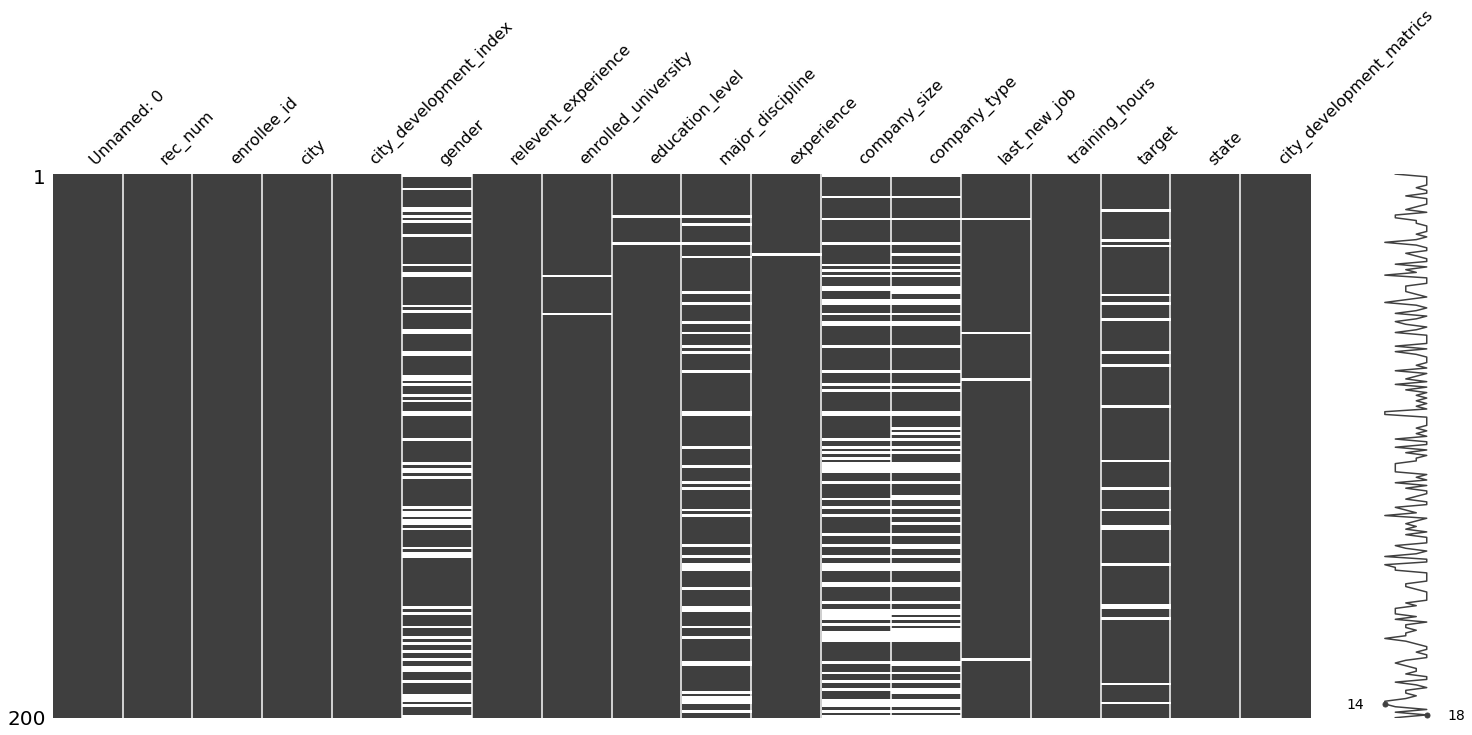

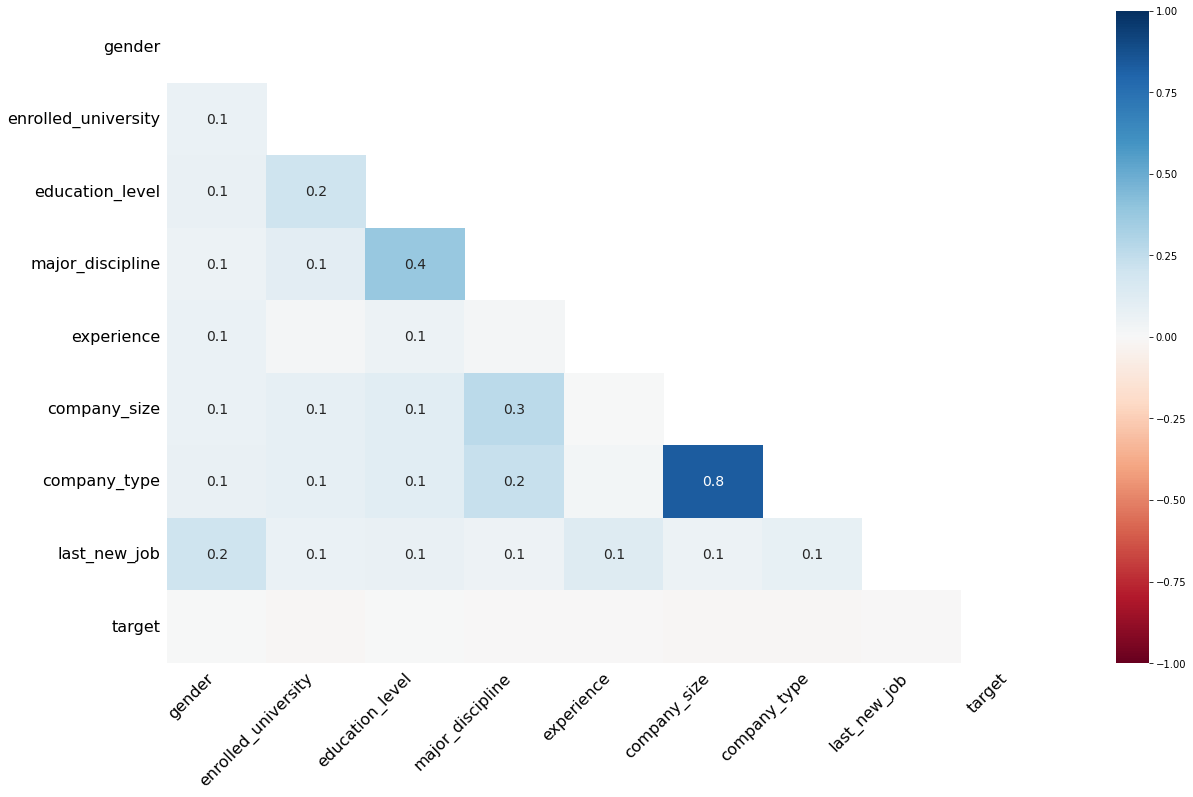

In [ ]:
msno.matrix(data.sample(200))
msno.heatmap(data)

### **Interpret any interesting information you found in the heatmap and any one plot**

According to the heatmap, the presence of null values in 'company_size' is strongly correlated with the presence of null values in 'company_type'. This makes sense, we can infer that the person filling out the info is not currently employed therfor will not have input for current company type or size.

## **8. Understanding Categorical attributes (this part may require you to make 20+ plots ) [26 pts]**

### **I. Use seaborn bar plot for the categorical feature to see different values and count**

<Figure size 720x720 with 0 Axes>

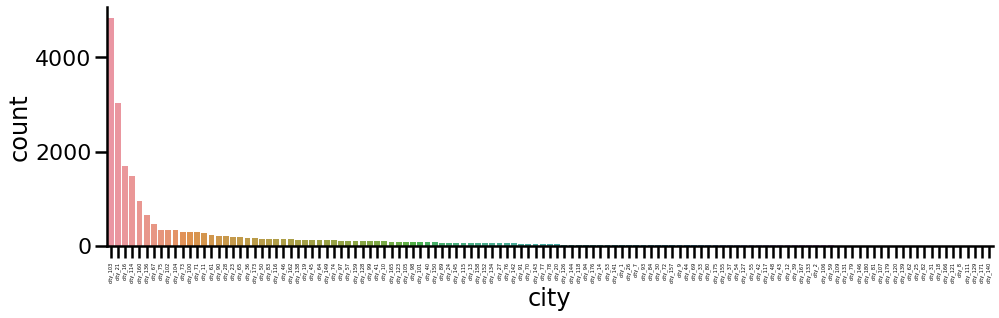

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x='city',
            data=data,
            kind='count',
            aspect=3,
            order=data['city'].value_counts().index)

plt.xticks(rotation=90, fontsize=5)
plt.show()

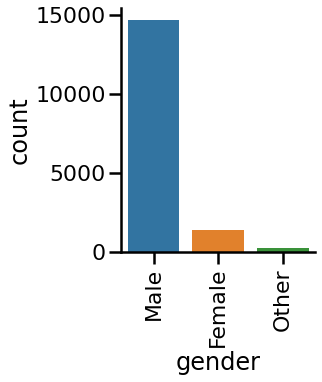

In [ ]:
sns.catplot(x='gender',
            data=data,
            kind='count',
            order=data['gender'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

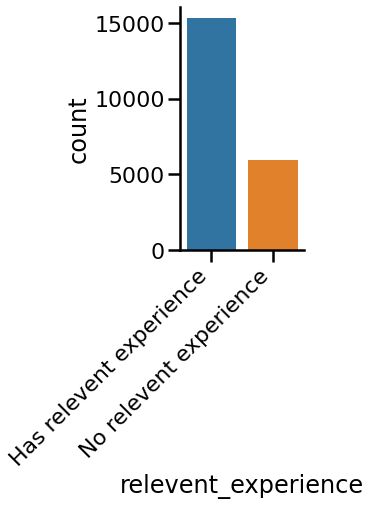

In [ ]:
sns.catplot(x='relevent_experience',
            data=data,
            kind='count',
            order=data['relevent_experience'].value_counts().index)

plt.xticks(rotation=45, ha='right')
plt.show()

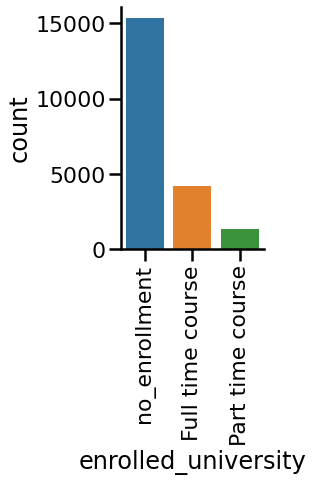

In [ ]:
sns.catplot(x='enrolled_university',
            data=data,
            kind='count',
            order=data['enrolled_university'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

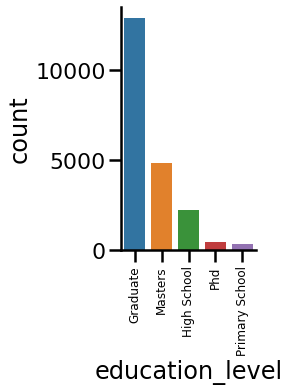

In [ ]:
sns.catplot(x='education_level',
            data=data,
            kind='count',
            order=data['education_level'].value_counts().index)

plt.xticks(rotation=90, fontsize=12)
plt.show()

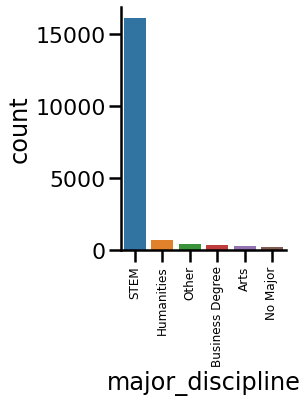

In [ ]:
sns.catplot(x='major_discipline',
            data=data,
            kind='count',
            order=data['major_discipline'].value_counts().index)

plt.xticks(rotation=90, fontsize=12)
plt.show()

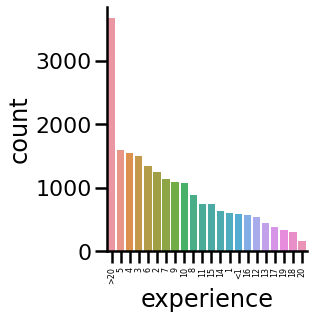

In [ ]:
sns.catplot(x='experience',
            data=data,
            kind='count',
            order=data['experience'].value_counts().index)

plt.xticks(rotation=90, fontsize=8)
plt.show()

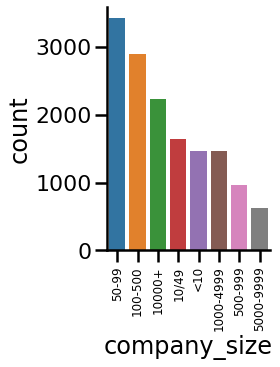

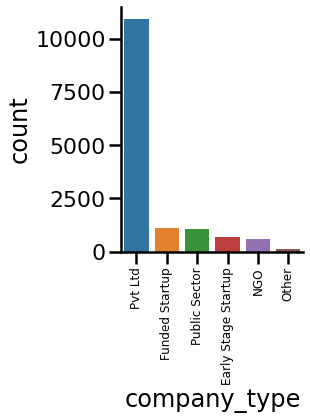

In [ ]:
sns.catplot(x='company_size',
            data=data,
            kind='count',
            order=data['company_size'].value_counts().index)

plt.xticks(rotation=90, fontsize=12)
plt.show()

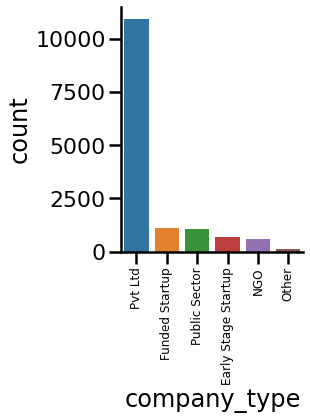

In [ ]:
sns.catplot(x='company_type',
            data=data,
            kind='count',
            order=data['company_type'].value_counts().index)

plt.xticks(rotation=90, fontsize=12)
plt.show()

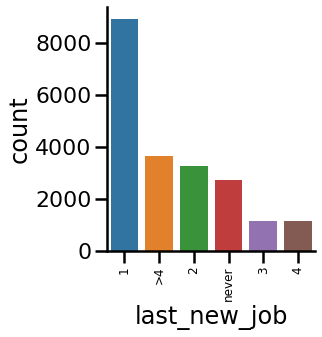

In [ ]:
sns.catplot(x='last_new_job',
            data=data,
            kind='count',
            order=data['last_new_job'].value_counts().index)

plt.xticks(rotation=90, fontsize=12)
plt.show()

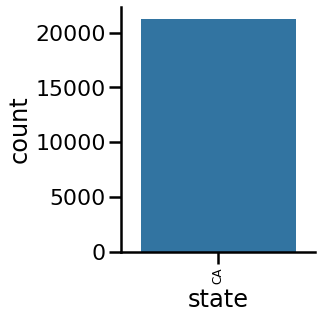

In [ ]:
sns.catplot(x='state',
            data=data,
            kind='count',
            order=data['state'].value_counts().index)

plt.xticks(rotation=90, fontsize=12)
plt.show()

### **II. Use seaborn countplot for the categorical feature against the values of the target**


<Figure size 720x720 with 0 Axes>

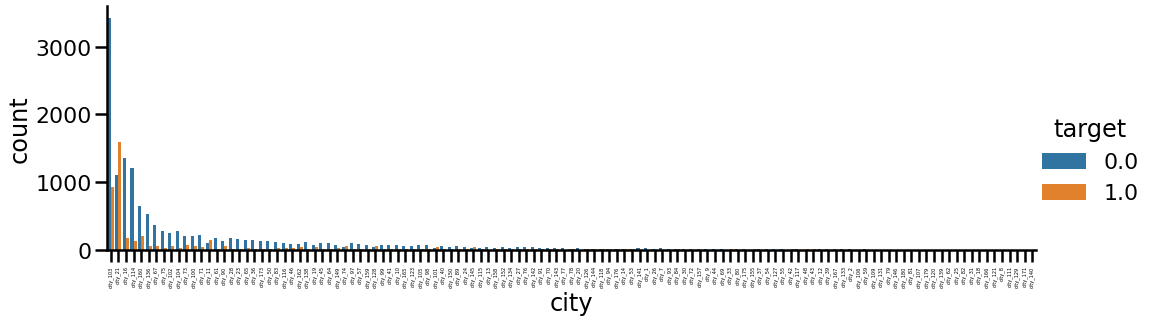

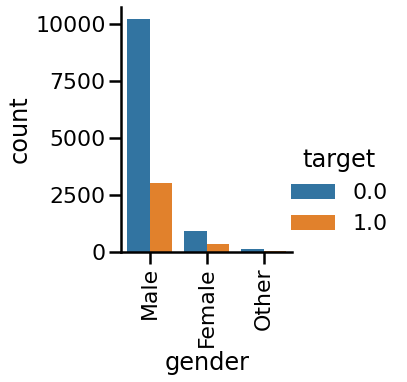

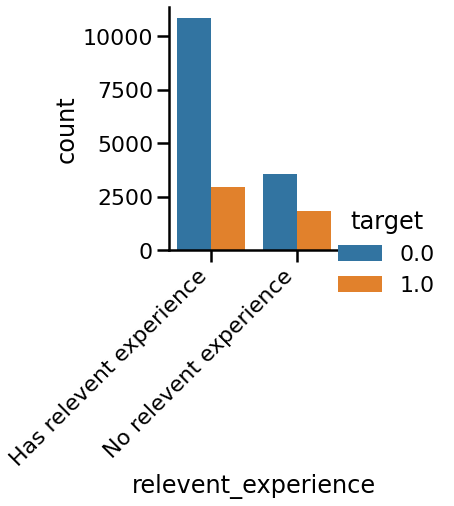

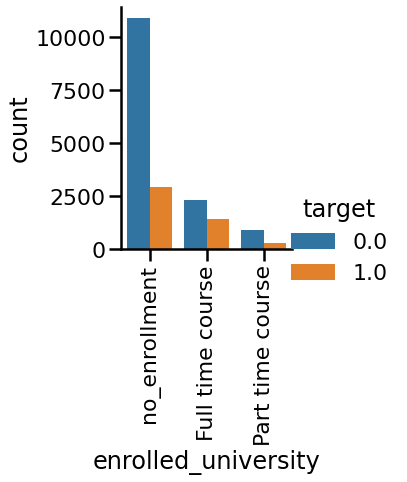

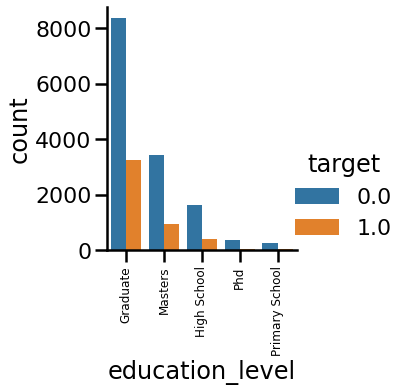

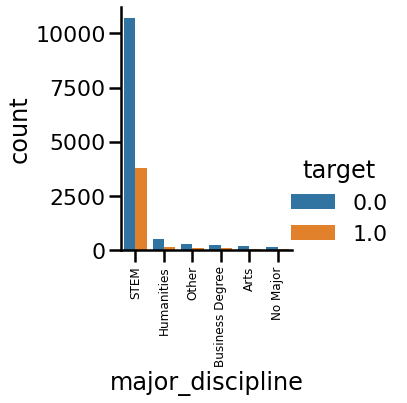

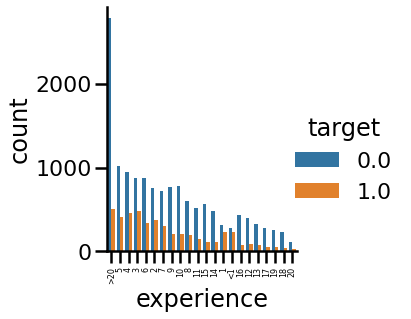

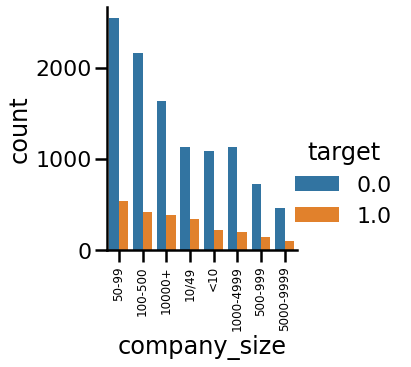

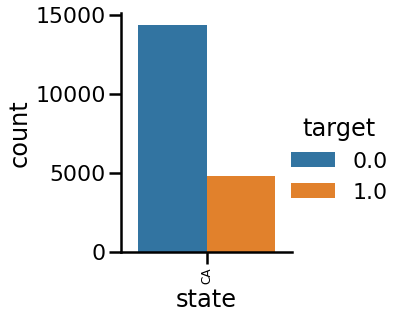

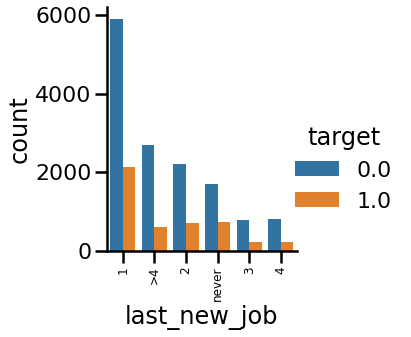

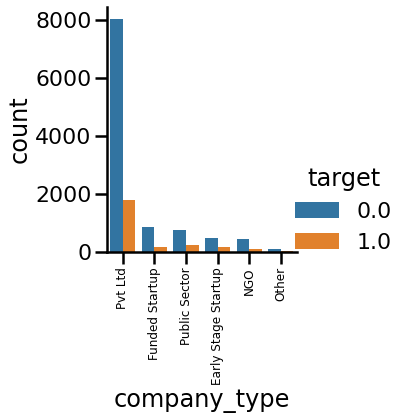

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x='city',
            hue='target',
            data=data,
            kind='count',
            aspect=3,
            order=data['city'].value_counts().index)
plt.xticks(rotation=90, fontsize=5)


sns.catplot(x='gender',
            hue='target',
            data=data,
            kind='count',
            order=data['gender'].value_counts().index)
plt.xticks(rotation=90)


sns.catplot(x='relevent_experience',
            hue='target',
            data=data,
            kind='count',
            order=data['relevent_experience'].value_counts().index)
plt.xticks(rotation=45, ha='right')


sns.catplot(x='enrolled_university',
            hue='target',
            data=data,
            kind='count',
            order=data['enrolled_university'].value_counts().index)
plt.xticks(rotation=90)


sns.catplot(x='education_level',
            hue='target',
            data=data,
            kind='count',
            order=data['education_level'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)


sns.catplot(x='major_discipline',
            hue='target',
            data=data,
            kind='count',
            order=data['major_discipline'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)


sns.catplot(x='experience',
            hue='target',
            data=data,
            kind='count',
            order=data['experience'].value_counts().index)
plt.xticks(rotation=90, fontsize=8)


sns.catplot(x='company_size',
            hue='target',
            data=data,
            kind='count',
            order=data['company_size'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)


sns.catplot(x='state',
            hue='target',
            data=data,
            kind='count',
            order=data['state'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)


sns.catplot(x='last_new_job',
            hue='target',
            data=data,
            kind='count',
            order=data['last_new_job'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)


sns.catplot(x='company_type',
            hue='target',
            data=data,
            kind='count',
            order=data['company_type'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)


plt.show()

### **III. Interpret any interesting information and any information that might help you to make any decision on combining, removing, or adding features based on that, or any resampling maybe needed.**

With the catplots, it is easy to compare different groups of each category variable. I used countplot instead of barplot in 8i to better show count of each variable without any extra functions.

## **9. Understanding Numerical attributes (16 pts)**

### **I. Plot their distributions using histogram**

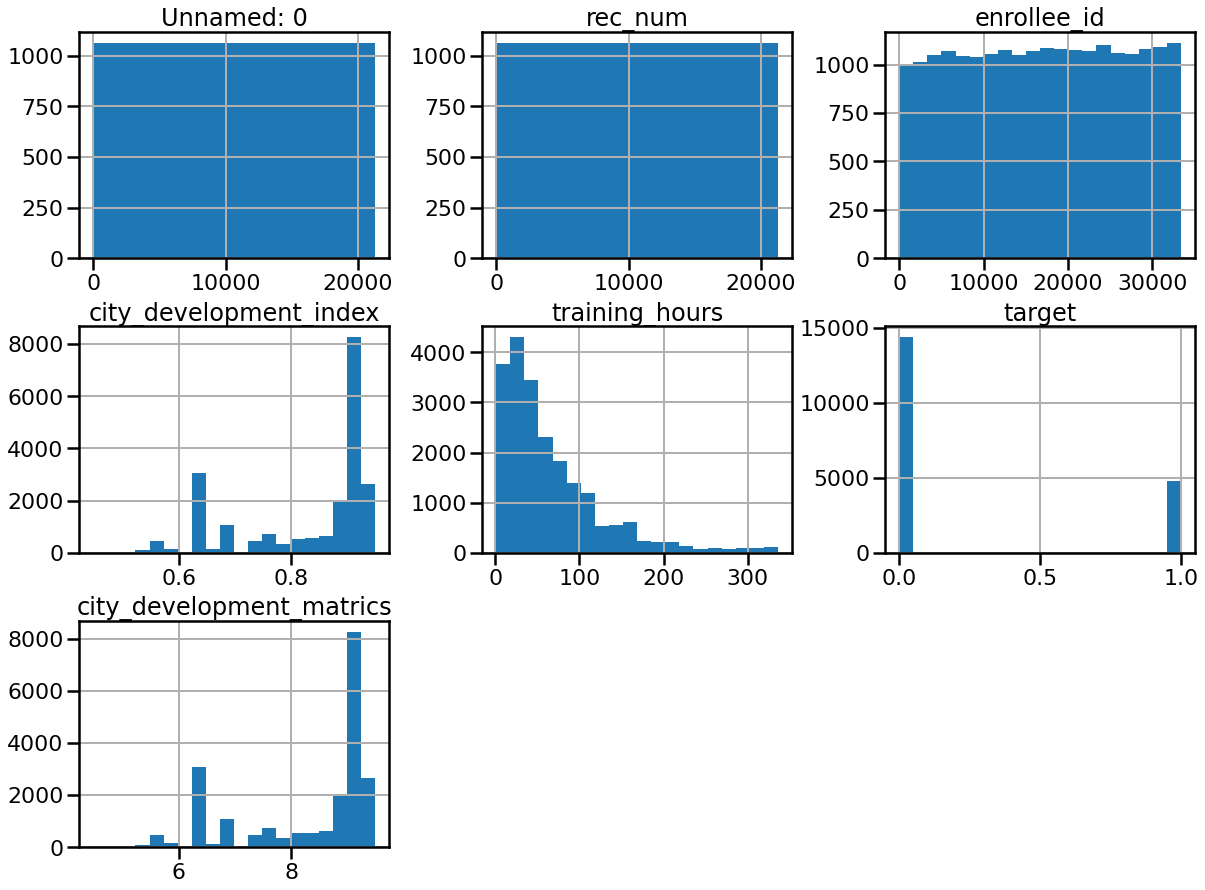

In [ ]:
data.hist(bins=20, figsize=(20,15))
plt.show()

### **II. Plot the distribution using seaborn distplot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

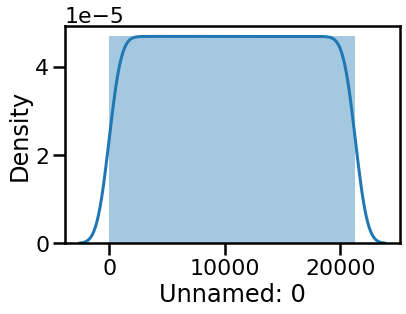

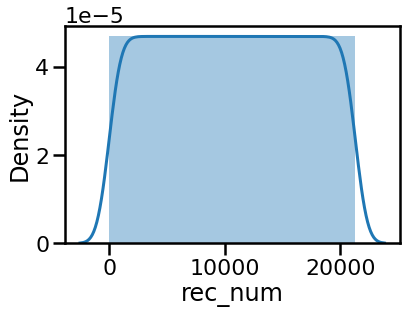

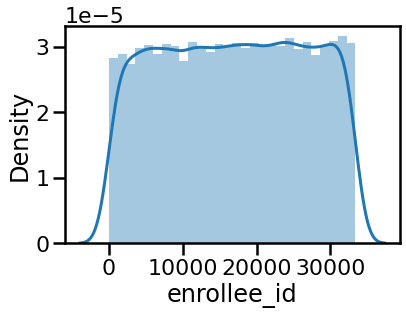

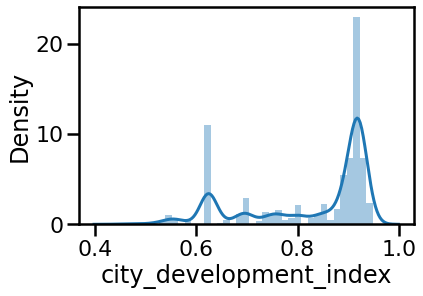

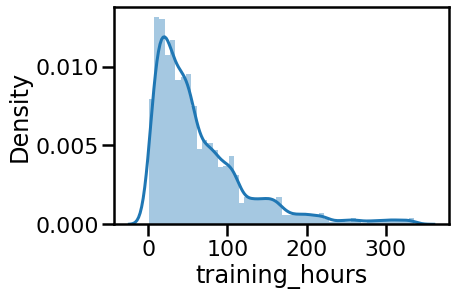

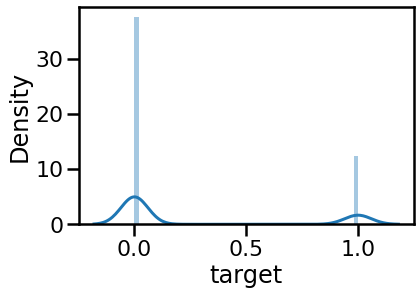

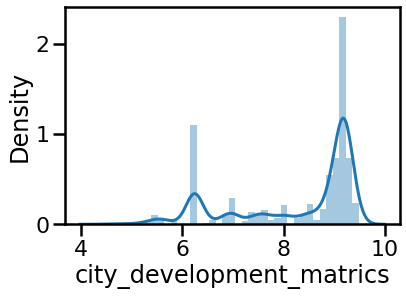

In [ ]:
plt.figure()
sns.distplot(data['Unnamed: 0'])
plt.figure()
sns.distplot(data['rec_num'])
plt.figure()
sns.distplot(data['enrollee_id'])
plt.figure()
sns.distplot(data['city_development_index'])
plt.figure()
sns.distplot(data['training_hours'])
plt.figure()
sns.distplot(data['target'])
plt.figure()
sns.distplot(data['city_development_matrics'])
plt.show()

### **III. Interpret any interesting information**

Looking at the distribution plots, it is obvious that the training_hours is heavily skewed towards lower hours.

## **10. Correlation: (15 pts)**

### **I. For the numerical attributes, use heatmap to show the correlation**

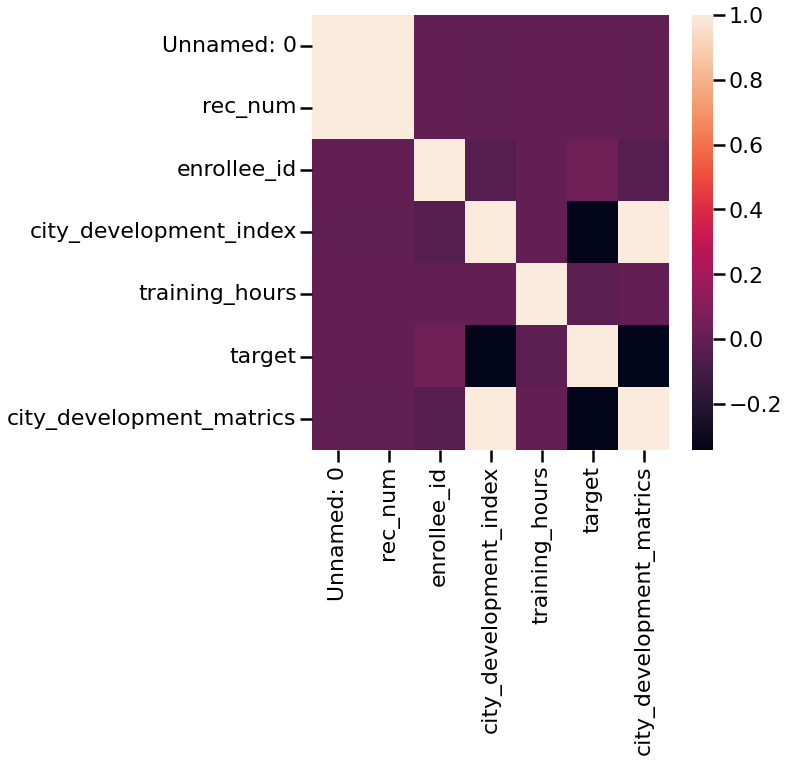

In [ ]:
correlation = numeric_features.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation)

### **II. If you find any interesting short list of columns, create another heatmap with them and show the correlations inside the heaptmap as well**

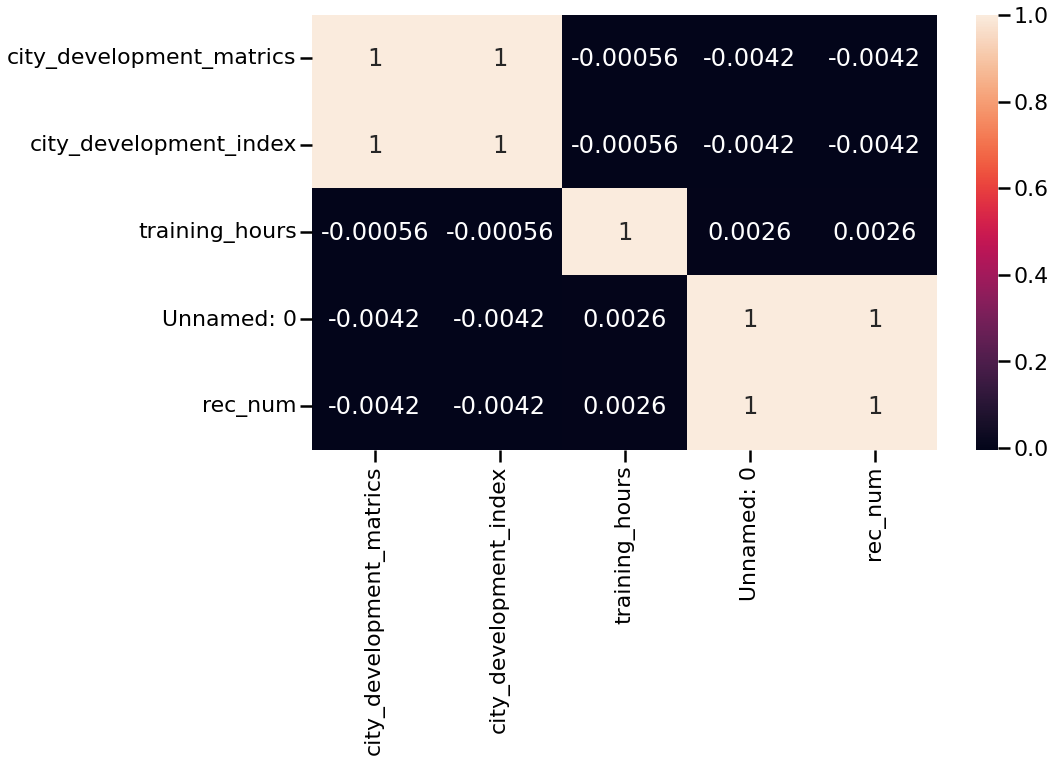

In [ ]:
columns = correlation.nlargest(5, 'city_development_matrics')['city_development_matrics'].index
c = np.corrcoef(data[columns].values.T)
plt.figure(figsize=(14,8))
sns.heatmap(c, annot=True, xticklabels=columns.values, yticklabels=columns.values)
plt.show()

### **III. Show scatter plots between columns to show the relationships with the target**

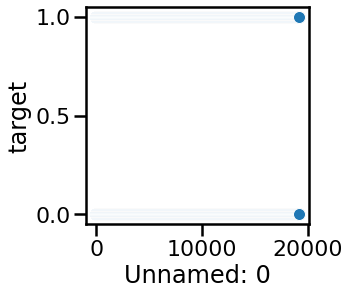

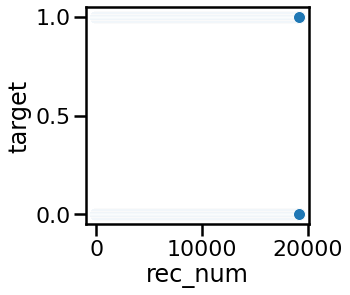

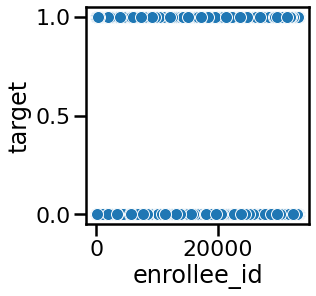

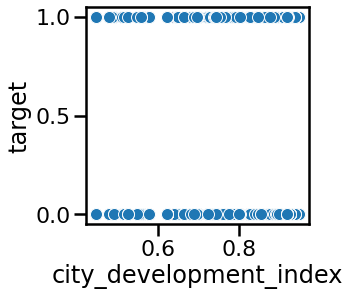

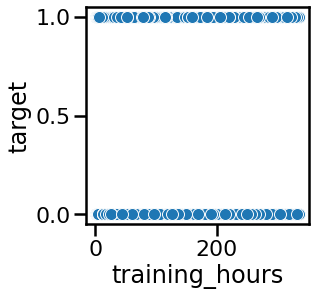

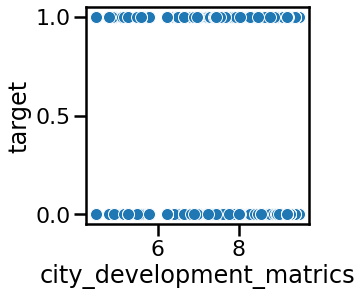

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Unnamed: 0', y='target', data=data)

plt.figure(figsize=(4,4))
sns.scatterplot(x='rec_num', y='target', data=data)

plt.figure(figsize=(4,4))
sns.scatterplot(x='enrollee_id', y='target', data=data)

plt.figure(figsize=(4,4))
sns.scatterplot(x='city_development_index', y='target', data=data)

plt.figure(figsize=(4,4))
sns.scatterplot(x='training_hours', y='target', data=data)

plt.figure(figsize=(4,4))
sns.scatterplot(x='city_development_matrics', y='target', data=data)

plt.show()

### **IV. Interpret and explain any finding and next course of action from there**

It does not make sense to use the scatterplot to detect correlation between target and other columns because the target variable can only have a value of 0 or 1.

I would eliminate either city_development_index or city_development_matrics given that they are 100% correlated, thus redundent.

## **11. Use boxplot or any other strategies to find outliers**

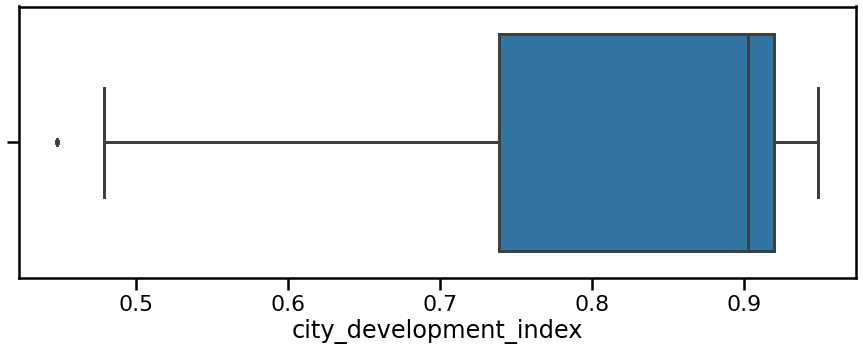

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = data['city_development_index'])
plt.show()

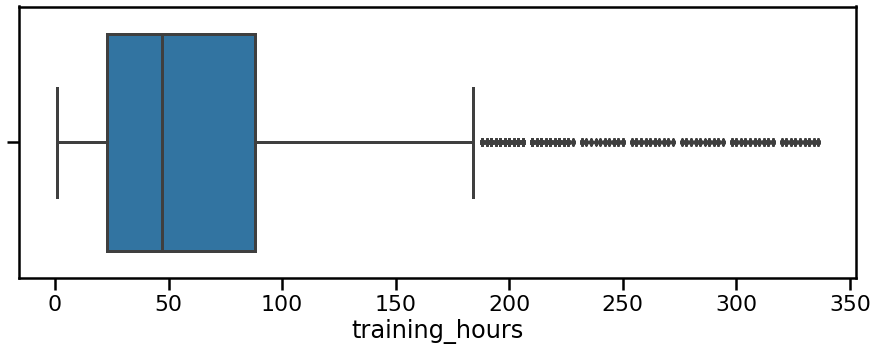

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = data['training_hours'])
plt.show()

## 12. What are the different values of experience, can you categorize them in to 0, 1, and 2? (5 pts)  


In [ ]:
names = [0 , 1, 2]
bins = [-np.inf, 1, 20, np.inf]

data['experience'] = data['experience'].str.replace('<1', '0')
data['experience'] = data['experience'].str.replace('>20', '21')
data['experience'] = data['experience'].astype(float)

data['experience_grouped'] = pd.cut(data['experience'], bins=bins, labels=names)

data['experience'].dtype
data['experience_grouped'].value_counts()


1    16347
2     3669
0     1201
Name: experience_grouped, dtype: int64

## **13. Finally after all the above EDA, summarize your finding, next course of action such as we may need to transform distribution because of right skew etc, need to remove a particular columns for any reasons, remove records for any reasons, need to rebalance data and what are the rebalancing options (if needed), and any other finding.**

First, we found out that there is a large number of missing values in some features such as company_type and company_size. These are likely due to the person not being currently employed, and it would be safe to drop these fields due to the large number of missing values.


We should also normalize training_hours because it is heavily skewed.


I would eliminate either city_development_index or city_development_matrics given that they are 100% correlated, thus redundent.


Although there are outliers in training_hours, there are a large amount that don't seem to be invalid, so it might be best to leave them alone.


In city_development_index, there are very few outliers and it might be best to drop them, it is likely invalid and shouldn't effect the outcome.


It could also be beneficial to group values of experience into bins, simplifying the data.